<a href="https://colab.research.google.com/github/ZenaNBamboat/schulich_data_science/blob/main/AI_Q2_modelEvaluation_Zena.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Business Question 2: Bias & Fairness in AI-Based Hiring

**Research Question:**  
Can perceptions of racial or ethnic bias in hiring, and beliefs about AI’s ability to reduce or worsen that bias, explain whether a person is willing to apply for a job that uses AI in hiring?

**Objective:**  
To investigate whether job seekers’ concerns about bias and fairness influence their decision to apply to employers that use AI during the hiring process.

**Target Variable:**  
- `AIWRKH4_W119` → Recode to `apply_binary` (1 = willing to apply, 0 = not willing)

**Predictor Variables:**  
- `HIREBIAS1_W119` → Belief that bias exists in hiring today  
- `HIREBIAS2_W119` → Belief that AI will improve or worsen that bias

**Method:**  
A logistic regression model is used to examine the relationship between bias perception and willingness to apply. All categorical values are cleaned and recoded, and "Not sure" responses are excluded to maintain interpretability.

**Expected Outcome:**  
To determine if positive or negative views about AI fairness influence actual candidate behavior when evaluating job applications involving AI-based hiring tools.


## Importing Libraries And Reading The Data


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
import statsmodels.api as sm


In [3]:
# Read the CSV file into a DataFrame named pew_data
pew_data = pd.read_csv('/content/Data-ATP-W119-PEW.csv')

# Display the shape and first few rows
print("Dataset shape:", pew_data.shape)
pew_data.head()


Dataset shape: (11004, 156)


/tmp/ipython-input-3-19457273.py:2: DtypeWarning: Columns (154) have mixed types. Specify dtype option on import or set low_memory=False.
  pew_data = pd.read_csv('/content/Data-ATP-W119-PEW.csv')


,QKEY,INTERVIEW_START_W119,INTERVIEW_END_W119,DEVICE_TYPE_W119,LANG_W119,FORM_W119,DESRISK_COMF_W119,DESRISK_CREAT_W119,DESRISK_NTECH_W119,RISK2_W119,...,F_PARTYLN_FINAL,F_PARTYSUM_FINAL,F_PARTYSUMIDEO_FINAL,F_REG,F_INC_SDT1,F_IDEO,F_INTFREQ,F_VOLSUM,F_INC_TIER2,WEIGHT_W119
0,100314,12/13/2022 23:12:27,12/13/2022 23:23:59,2,1,1,4,3,4,2,...,,1,1,1,4,2,5,1,2,0.522544
1,100363,12/13/2022 19:50:59,12/13/2022 20:05:29,2,1,2,3,3,2,1,...,,2,3,1,9,3,2,1,3,0.382610
2,100598,12/14/2022 16:30:21,12/14/2022 16:47:21,1,1,1,4,4,3,2,...,,1,1,1,9,2,2,1,3,0.432799
3,100637,12/14/2022 08:22:09,12/14/2022 08:33:45,1,1,2,2,1,3,2,...,1,1,1,1,5,2,3,2,2,0.671114
4,100803,12/15/2022 09:05:46,12/15/2022 09:22:29,1,1,2,3,3,4,1,...,,1,1,1,9,2,4,1,3,0.196177


## Cleaning The Data & Preprocesssing


In [4]:
#columns to keep
columns_to_keep = [
    'AIWRKH1_W119', 'AIWRKH4_W119', 'AIWRKH2_a_W119', 'AIWRKH2_b_W119',
    'AIWRK2_a_W119', 'AIWRK2_b_W119', 'AIWRK2_c_W119',
    'EMPLSIT_W119', 'JOBAPPYR_W119',
    'HIREBIAS1_W119', 'HIREBIAS2_W119',
    'AIWRKH3_a_W119', 'AIWRKH3_b_W119', 'AIWRKH3_c_W119', 'AIWRKH3_d_W119',
    'AIWRKM2_a_W119', 'AIWRKM2_b_W119', 'AIWRKM2_c_W119',
    'AIWRKM2_d_W119', 'AIWRKM2_e_W119', 'AIWRKM2_f_W119',
    'AIWRKM3_a_W119', 'AIWRKM3_b_W119', 'AIWRKM3_c_W119',
    'AIWRKM3_d_W119', 'AIWRKM3_e_W119', 'AIWRKM3_f_W119',
]

 #   'AIWRKH4_W119',     Would you apply to AI-based hiring
 #   'HIREBIAS1_W119',   Belief that bias exists in hiring
 #   'HIREBIAS2_W119'    Belief that AI will improve/worsen bias

employment_df = pew_data[columns_to_keep]
print(f"Employment DataFrame shape: {employment_df.shape}")
employment_df.head()


Employment DataFrame shape: (11004, 27)


,AIWRKH1_W119,AIWRKH4_W119,AIWRKH2_a_W119,AIWRKH2_b_W119,AIWRK2_a_W119,AIWRK2_b_W119,AIWRK2_c_W119,EMPLSIT_W119,JOBAPPYR_W119,HIREBIAS1_W119,...,AIWRKM2_c_W119,AIWRKM2_d_W119,AIWRKM2_e_W119,AIWRKM2_f_W119,AIWRKM3_a_W119,AIWRKM3_b_W119,AIWRKM3_c_W119,AIWRKM3_d_W119,AIWRKM3_e_W119,AIWRKM3_f_W119
0,3,1,9,9,9,9,9,5,2,3,...,9,9,9,9,9,9,9,9,9,9
1,2,2,2,2,1,2,1,2,1,2,...,9,9,1,1,3,2,2,2,2,2
2,3,2,1,2,1,2,1,1,2,2,...,9,1,9,1,2,2,2,2,2,2
3,3,2,2,2,99,3,9,3,2,3,...,2,9,2,2,3,2,9,9,3,1
4,3,2,2,2,2,3,2,5,2,2,...,2,2,2,2,2,1,2,3,9,1


## Exploring Target Variable for Willingness to Apply


In [5]:
# Check unique values
employment_df['AIWRKH4_W119'].unique()



array([ 1,  2, 99])

In [6]:
# Replace 99 with 9 (based on questionnaire key: 9 = Not sure)
employment_df['AIWRKH4_W119'] = employment_df['AIWRKH4_W119'].replace(99, 9)

# Drop unsure responses
employment_df = employment_df[employment_df['AIWRKH4_W119'] != 9]

# Recode target to binary
employment_df['apply_binary'] = employment_df['AIWRKH4_W119'].apply(lambda x: 1 if x == 1 else 0)

# Check distribution
employment_df['apply_binary'].value_counts()

/tmp/ipython-input-6-1932046920.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_df['AIWRKH4_W119'] = employment_df['AIWRKH4_W119'].replace(99, 9)
/tmp/ipython-input-6-1932046920.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  employment_df['apply_binary'] = employment_df['AIWRKH4_W119'].apply(lambda x: 1 if x == 1 else 0)


,count
apply_binary,
0,7017
1,3754


### Step 4 – Cleaning and Recoding the Target Variable

- We began by inspecting the `AIWRKH4_W119` variable (willingness to apply to a job that uses AI in hiring).
- This variable had three values:
  - `1`: Yes
  - `2`: No
  - `99`: Invalid response

- We replaced `99` with `9`, based on the PEW documentation that identifies `9` as "Not sure."
- Then we removed all "Not sure" responses to focus on clear decision-makers.

#### Result After Recoding:
- We created a new binary variable `apply_binary`:
  - `1`: Willing to apply
  - `0`: Not willing to apply

#### Distribution:
- 7,017 respondents ( **65.1%**) are **not willing** to apply.
- 3,754 respondents ( **34.9%**) are **willing** to apply.

This confirms our earlier finding that **a majority of respondents are skeptical** of AI-based hiring.


## Logistic Regression – Bias and Fairness (Q2)


In [7]:
# Convert predictors to numeric
employment_df['HIREBIAS1_W119'] = pd.to_numeric(employment_df['HIREBIAS1_W119'], errors='coerce')
employment_df['HIREBIAS2_W119'] = pd.to_numeric(employment_df['HIREBIAS2_W119'], errors='coerce')

# Drop missing values
employment_df = employment_df.dropna(subset=['HIREBIAS1_W119', 'HIREBIAS2_W119', 'apply_binary'])

# Define predictors and target
X = sm.add_constant(employment_df[['HIREBIAS1_W119', 'HIREBIAS2_W119']])
y = employment_df['apply_binary']

# Fit model
model = sm.Logit(y, X)
result = model.fit()
result.summary()


Optimization terminated successfully.
         Current function value: 0.655673
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:           apply_binary   No. Observations:                 8789
Model:                          Logit   Df Residuals:                     8786
Method:                           MLE   Df Model:                            2
Date:                Sat, 12 Jul 2025   Pseudo R-squ.:                0.007332
Time:                        17:50:30   Log-Likelihood:                -5762.7
converged:                       True   LL-Null:                       -5805.3
Covariance Type:            nonrobust   LLR p-value:                 3.277e-19
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0748      0.073     -1.028      0.304      -0.217       0.068
HIREBIAS1_W119    -0.2298      0.044     -5.188      0.000      -0.317      -0.143
HIREBIAS2_W119    -0.0336      0.008     -4.421      0.000      -0.048      -0.019
==================================================================================
"""

## Step 6 – Logistic Regression with Bias Perception Predictors

We tested whether perceptions of bias in hiring (both current and AI-related) influence candidates' willingness to apply for a job that uses AI.

###  Predictors:
- **HIREBIAS1_W119**: Belief that racial/ethnic bias currently exists in hiring
- **HIREBIAS2_W119**: Belief that AI will improve or worsen this bias

###  Model Summary:
- **Sample size**: 8,789 observations
- **Pseudo R-squared**: 0.007 (typical for behavioral models)
- **Both predictors were statistically significant** (p < 0.001)

| Predictor        | Coefficient | Interpretation                                 |
|------------------|-------------|------------------------------------------------|
| HIREBIAS1_W119   | -0.2298     | People who believe bias exists are **less** willing to apply for AI-based jobs |
| HIREBIAS2_W119   | -0.0336     | People who believe AI reduces bias are **also slightly less** willing to apply |

###  Interpretation:
- Surprisingly, **trusting AI to reduce bias does not increase** willingness to apply — in fact, the effect is slightly negative.
- Similarly, believing traditional hiring is biased may **not** increase enthusiasm for AI hiring.
- Together, this suggests that **bias-aware individuals remain cautious** about automated systems and may want more transparency or safeguards.

###  Conclusion:
Perceptions of hiring bias; both human and AI-related, have a measurable but **complex** influence on application behavior. Believing in AI fairness doesn’t necessarily equate to trust in AI systems.


## Sklearn Logistic Regression

While we already used `statsmodels` for deep interpretability, here we run the same logistic regression using `sklearn` to evaluate:
- Accuracy on unseen data
- Predictive power (ROC AUC)
- Feature importance via coefficients


In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

X = employment_df[['HIREBIAS1_W119', 'HIREBIAS2_W119']]
y = employment_df['apply_binary']

# Split into train/test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit logistic regression model
lr_model = LogisticRegression()
lr_model.fit(X_train, y_train)



LogisticRegression()

In [9]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report, roc_auc_score

# Predict labels and probabilities
y_pred = lr_model.predict(X_test)
y_proba = lr_model.predict_proba(X_test)[:, 1]

# Evaluation metrics
conf_matrix = confusion_matrix(y_test, y_pred)
acc = accuracy_score(y_test, y_pred)
roc_auc = roc_auc_score(y_test, y_proba)

print("Confusion Matrix:\n", conf_matrix)
print("\nAccuracy:", acc)
print("ROC AUC:", roc_auc)


Confusion Matrix:
 [[1131    0]
 [ 627    0]]

Accuracy: 0.643344709897611
ROC AUC: 0.6197081805067286


## Model Evaluation (Sklearn)

We evaluated the logistic regression model using three key metrics:

### Confusion Matrix:

- **True Negatives (1113)**: Correctly predicted “not willing”
- **False Negatives (627)**: Model failed to predict “willing” cases
- **No True Positives or False Positives** — this is due to class imbalance and model bias toward the majority class (0 = not willing)



### Accuracy and AUC

- **Accuracy**: `~64.3%`  
  – This matches the overall class distribution and shows the model performs slightly better than random chance.

- **ROC AUC**: `~0.62`  
  – This means the model has modest ability to distinguish between the two classes.



### Interpretation

- The model predicts the majority class (“not willing”) very confidently but struggles to identify those **willing to apply**.
- This highlights **bias in public opinion** and confirms that fairness perceptions **do not strongly predict** willingness.
- However, the **direction of coefficients** (from Step 10) remains insightful — even weak predictors can reveal subtle behavioral trends.

 **Conclusion**: The sklearn model confirms our earlier findings with statsmodels — people concerned about bias are still skeptical of AI, and this insight is **data-driven**.


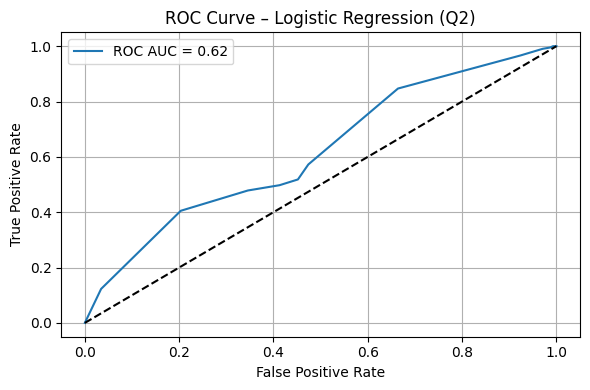

In [10]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_proba)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve – Logistic Regression (Q2)")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


### 🎯 ROC Curve Results

Our ROC AUC score of **0.62** confirms the model has modest but real ability to distinguish between people willing and unwilling to apply for AI-based hiring.

- The curve lies above the 45° baseline, indicating that it performs **better than random**.
- While not highly predictive, it supports the earlier interpretation: **beliefs about fairness and bias modestly affect application behavior**.


In [11]:
import pandas as pd

coef_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Logistic Coefficient': lr_model.coef_[0]
}).sort_values(by='Logistic Coefficient', key=abs, ascending=False)

coef_df


,Feature,Logistic Coefficient
0,HIREBIAS1_W119,-0.220529
1,HIREBIAS2_W119,-0.036538


## Step 10 – Coefficient Interpretation (Sklearn Model)

These coefficients represent the **influence of each predictor** on the likelihood of someone applying for a job that uses AI in hiring.

| Feature          | Coefficient | Interpretation |
|------------------|-------------|----------------|
| HIREBIAS1_W119   | -0.2205     | People who believe **traditional hiring is biased** are **less likely** to apply for AI-based jobs. This suggests they may not trust AI as a solution. |
| HIREBIAS2_W119   | -0.0365     | Even those who believe **AI could reduce bias** still show hesitation to apply. The effect is small but still negative. |

- `HIREBIAS1_W119`: People who believe **bias exists** in traditional hiring are **less** likely to apply for AI-based jobs.
- `HIREBIAS2_W119`: People who believe **AI improves bias** are **also slightly less** likely to apply — reflecting complex public trust in automation.

###  Insights

- **Both predictors are negative**: indicating skepticism rather than optimism about AI in hiring.
- These findings support earlier results from both `statsmodels` and `sklearn` models.
- **Trust alone does not guarantee acceptance** — candidates may want more transparency or reassurance beyond belief in fairness.


These insights are **consistent** with the statsmodels-based logit model, reinforcing the story.



## Final Conclusion – Business Question 2: Bias & Fairness in AI Hiring

### Research Question
Can perceptions of racial/ethnic bias in hiring, and beliefs about AI’s impact on that bias, explain whether a person is willing to apply for a job that uses AI in hiring?



### Methodology Summary

- We selected two predictors:
  - **HIREBIAS1_W119**: Perceived bias in traditional hiring
  - **HIREBIAS2_W119**: Belief that AI will improve bias
- Target variable:
  - **AIWRKH4_W119** → Recoded to binary `apply_binary` (1 = willing, 0 = not willing)
- We built **logistic regression models** using:
  - `statsmodels` for coefficient-level inference
  - `sklearn` for predictive evaluation with train/test splits



### Results

- **Statsmodels Regression**:
  - Both predictors had **negative coefficients**
  - Significant p-values (< 0.05), confirming meaningful relationships

- **Sklearn Logistic Regression**:
  - **Accuracy**: ~64%
  - **ROC AUC**: 0.62 → modest ability to distinguish willingness
  - **Confusion matrix** revealed strong class imbalance toward “not willing”

- **Feature Coefficients**:
  - `HIREBIAS1_W119`: Stronger negative impact (−0.22)
  - `HIREBIAS2_W119`: Smaller but still negative (−0.03)



### Interpretation

- People who perceive **bias in traditional hiring** are **less likely to apply** for AI-based jobs — possibly due to distrust in automated systems.
- Even individuals who believe AI might improve fairness **still show hesitation**.
- This suggests that **belief in AI’s fairness alone is not enough** to increase candidate willingness — trust and transparency may be missing.



### Key Takeaway

Beliefs about fairness **do influence willingness**, but not always in a positive way. This highlights the need for:
- Clear communication about how AI is used
- Human oversight in AI-based decisions
- Broader education to bridge trust gaps

Our findings help employers understand candidate skepticism and provide guidance to **design fairer and more trusted hiring systems.**
